# WEEK - 2 ASSIGNMENTS
## Data Science & Data Analytics Laboratory
### Name: Kinjal Raykarmakar
#### Section: CSE 3H
#### Roll No.: 29
#### Enrollment No.: 12018009019439

# Regression - Diabetes

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR) # DESCR stands for description

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [5]:
import pandas as pd

In [7]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [9]:
data['y'] = pd.DataFrame(diabetes.target)

In [10]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [13]:
corr_mat = pd.DataFrame(data.corr().round(2))
corr_mat

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.19
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21,0.04
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.21
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.17
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.39
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.43
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.57
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.38


In [16]:
max_pos_corr = corr_mat["y"][:-1].idxmax()
max_pos_corr

'bmi'

In [17]:
x = data[max_pos_corr]
y = data['y']

In [18]:
pd.DataFrame([x, y]).transpose().head()

,bmi,y
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [20]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

print(sqrt(mean_squared_error(y_pred, y_test)))

58.02587463992506


In [24]:
print("y = {} {} + {}".format(model.coef_[0].round(2),  max_pos_corr, model.intercept_.round(2)))

y = 927.34 bmi + 151.15


In [25]:
from matplotlib import pyplot as plt
%matplotlib inline

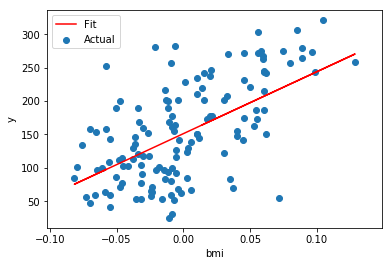

In [26]:
plt.scatter(x_test, y_test, label="Actual")
plt.plot(x_test, y_pred, color="red", label="Fit")
plt.xlabel(max_pos_corr)
plt.ylabel("y")
plt.legend()
plt.show()